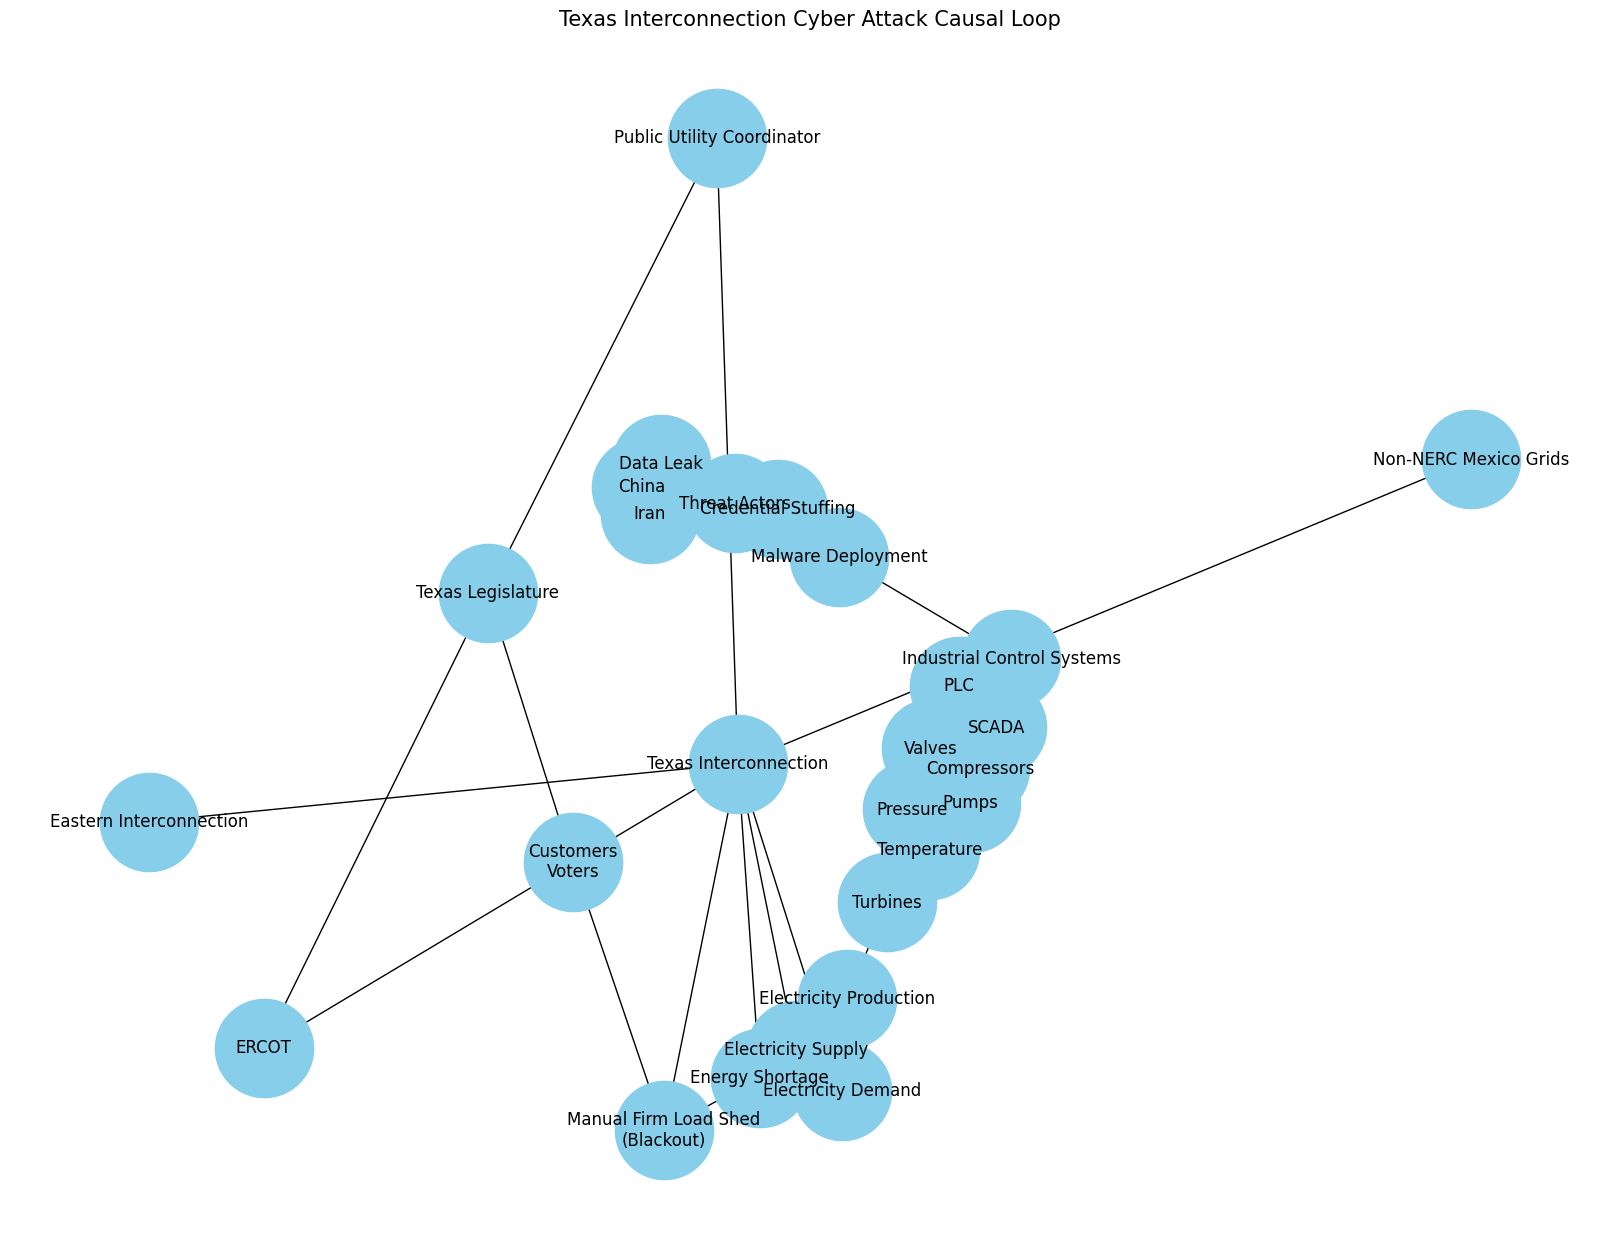

In [52]:
import matplotlib.pyplot as plt
import networkx as nx

# Creating a directed graph
G = nx.DiGraph()

# Adding nodes
nodes = [
    "Threat Actors", "China", "Iran",
    "Data Leak", "Credential\nStuffing", "Malware Deployment", "Industrial Control Systems", "SCADA", "PLC",
    "Valves", "Pumps", "Compressors", "Pressure", "Temperature", "Turbines", "Electricity Production",
    "Electricity Supply",  "Electricity Demand", "Energy Shortage", "Manual Firm Load Shed\n(Blackout)",
    "Texas Interconnection", "ERCOT", "Texas Legislature", "Public Utility Coordinator", "Non-NERC Mexico Grids", "Eastern Interconnection",
    "Customers\nVoters"
]
G.add_nodes_from(nodes)

# Adding edges
edges = [
    ("China","Iran"),
    ("China", "Threat Actors"),
    ("Iran", "Threat Actors"),
    ("Threat Actors", "Malware Deployment"),
    ("Threat Actors", "Data Leak"),
    ("Threat Actors", "Credential\nStuffing"),
    ("Electricity Demand", "Electricity Supply"),
    ("Energy Shortage", "Electricity Demand"),
    ("Electricity Supply", "Energy Shortage"),
    # ("Malware Deployment", "Electricity Supply"),
    ("Data Leak", "Credential\nStuffing"),
    ("Credential\nStuffing", "Malware Deployment"),
    ("Malware Deployment", "Data Leak"),
    ("Energy Shortage", "Manual Firm Load Shed\n(Blackout)"),
    ("Malware Deployment","Industrial Control Systems"),
    ("Industrial Control Systems","SCADA"),
    ("Industrial Control Systems","PLC"),
    ("PLC", "Valves"),
    ("SCADA", "Valves"),
    ("PLC","Compressors"),
    ("Pressure", "Temperature"),
    ("SCADA","Pumps"),
    ("Pumps","Pressure"),
    ("Valves","Pressure"),
    ("Compressors","Pressure"),
    ("Temperature","Turbines"),
    ("Pressure","Turbines"),
    ("Turbines","Electricity Production"),
    ("Electricity Production", "Electricity Supply"),
    ("Valves", "Temperature"),
    ("Pumps","Temperature"),
    ("Texas Interconnection","Electricity Supply"),
    ("Texas Interconnection","Electricity Demand"),
    ("Texas Interconnection","Energy Shortage"),
    ("Texas Interconnection","Manual Firm Load Shed\n(Blackout)"),
    ("Texas Interconnection","ERCOT"),
    ("Texas Interconnection","Public Utility Coordinator"),
    ("Texas Interconnection","Non-NERC Mexico Grids"),
    ("Texas Interconnection","Eastern Interconnection"),
    ("Texas Legislature","Public Utility Coordinator"),
    ("Texas Legislature","ERCOT"),
    ("Customers\nVoters","Texas Legislature"),
    ("Customers\nVoters","Manual Firm Load Shed\n(Blackout)")
    
]
G.add_edges_from(edges)

# Graph layout
# pos = nx.circular_layout(G)  # Choose your preferred layout
# pos = nx.shell_layout(G)
# pos = nx.spring_layout(G)
pos = nx.fruchterman_reingold_layout(G)
# pos = nx.kamada_kawai_layout(G)
# pos = nx.planar_layout(G)
# pos = nx.spiral_layout(G)
# pos = nx.spectral_layout(G)

# Drawing the graph without edge labels
plt.figure(figsize=(16, 12))
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=5000, edge_color='black', linewidths=1, font_size=12, arrows=False)
plt.title("Texas Interconnection Cyber Attack Causal Loop", fontsize=15)
plt.savefig('network_diagram.png', bbox_inches='tight')
plt.show()

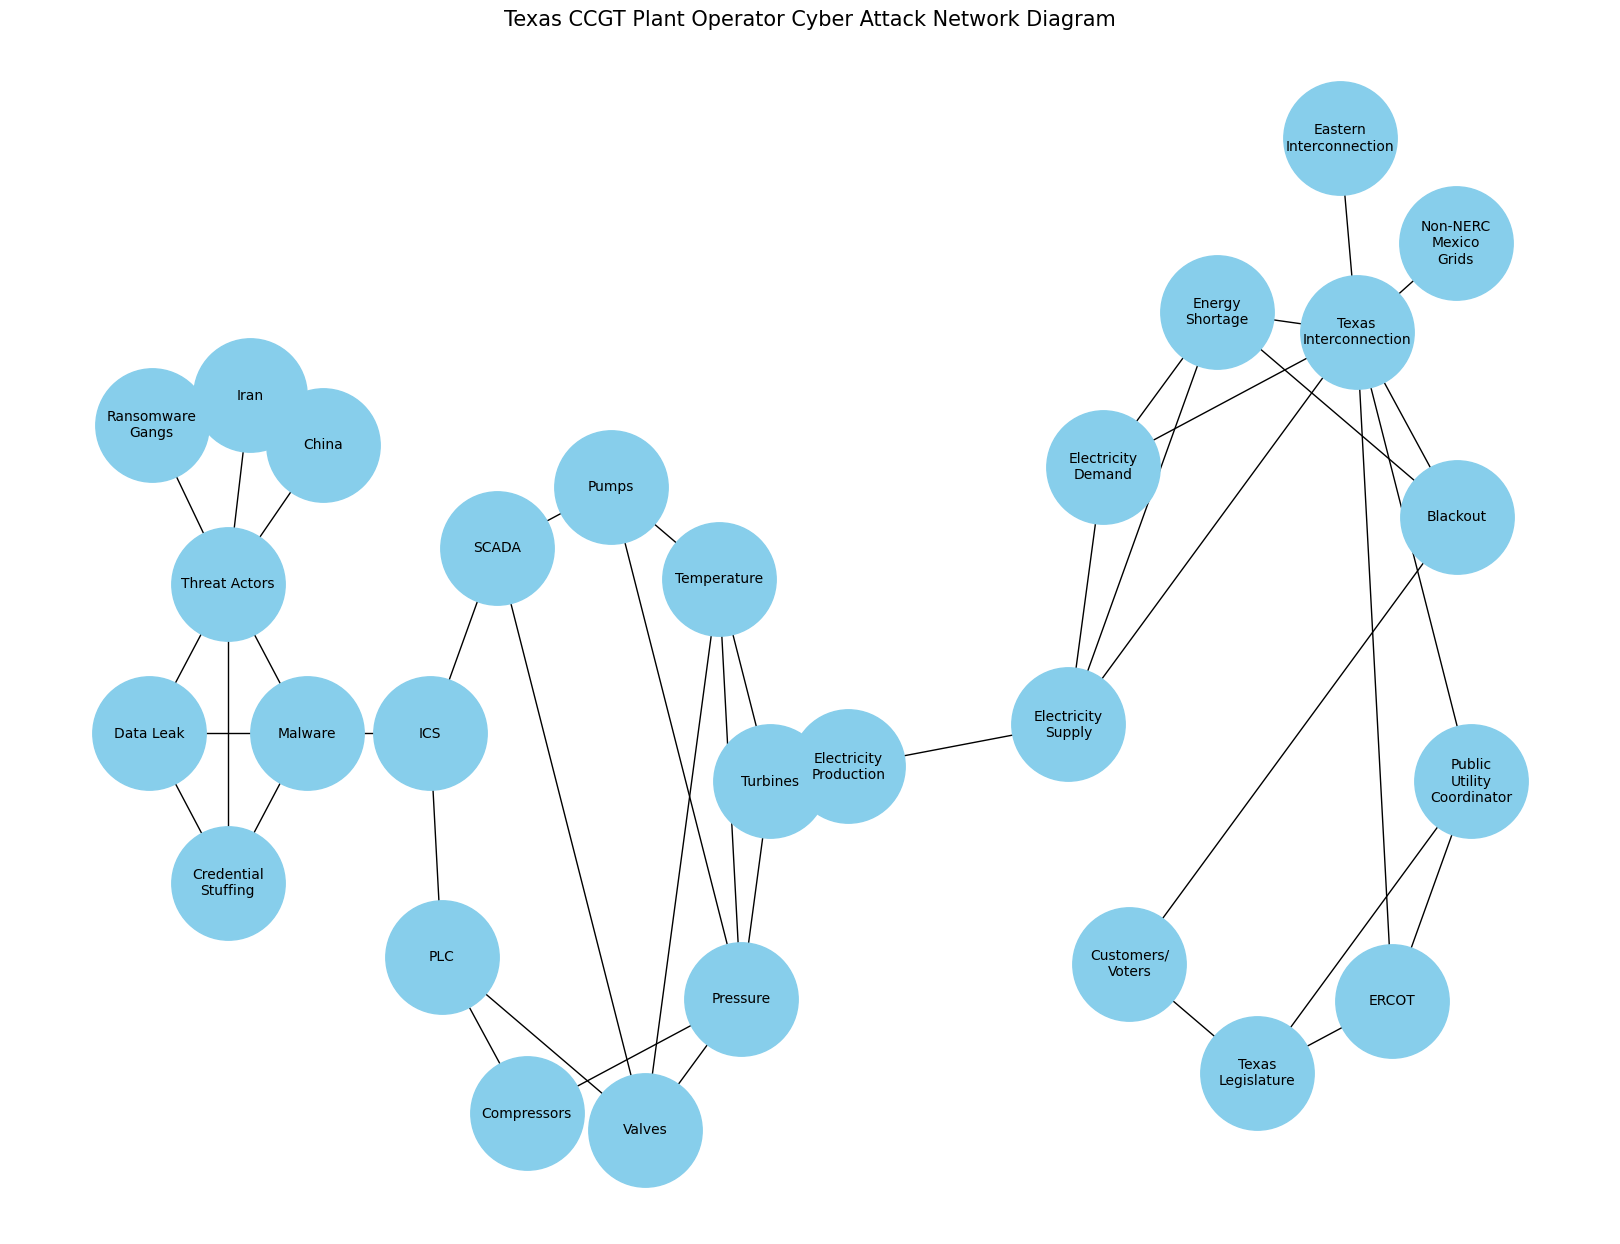

In [15]:
import matplotlib.pyplot as plt
import networkx as nx
import pygraphviz as pgv
from networkx.drawing.nx_agraph import graphviz_layout

import matplotlib.pyplot as plt
import networkx as nx

# Creating a directed graph
G = nx.DiGraph()

# Adding nodes
nodes = [
    "Threat Actors", "China", "Iran", "Ransomware\nGangs", "Data Leak", "Credential\nStuffing", "Malware", "Energy\nShortage", "Blackout", # red, threats
    "ICS", "SCADA", "PLC", "Valves", "Pumps", "Compressors", "Pressure", "Temperature", "Turbines", "Electricity\nProduction", # yellow, generation
    "Electricity\nSupply",  "Electricity\nDemand", "Texas\nInterconnection", "ERCOT", "Texas\nLegislature", "Public\nUtility\nCoordinator", "Customers/\nVoters", # green, governance
    "Non-NERC\nMexico\nGrids", "Eastern\nInterconnection" # blue, dc ties
]
G.add_nodes_from(nodes)

# Adding edges
edges = [
    ("China", "Threat Actors"),
    ("Iran", "Threat Actors"),
    ("Ransomware\nGangs", "Threat Actors"),
    ("Threat Actors", "Malware"),
    ("Threat Actors", "Data Leak"),
    ("Threat Actors", "Credential\nStuffing"),
    ("Electricity\nDemand", "Electricity\nSupply"),
    ("Energy\nShortage", "Electricity\nDemand"),
    ("Electricity\nSupply", "Energy\nShortage"),
    ("Data Leak", "Credential\nStuffing"),
    ("Credential\nStuffing", "Malware"),
    ("Malware", "Data Leak"),
    ("Energy\nShortage", "Blackout"),
    ("Malware","ICS"),
    ("ICS","SCADA"),
    ("ICS","PLC"),
    ("PLC", "Valves"),
    ("SCADA", "Valves"),
    ("PLC","Compressors"),
    ("Pressure", "Temperature"),
    ("SCADA","Pumps"),
    ("Pumps","Pressure"),
    ("Valves","Pressure"),
    ("Compressors","Pressure"),
    ("Temperature","Turbines"),
    ("Pressure","Turbines"),
    ("Turbines","Electricity\nProduction"),
    ("Electricity\nProduction", "Electricity\nSupply"),
    ("Valves", "Temperature"),
    ("Pumps","Temperature"),
    ("Texas\nInterconnection","Electricity\nSupply"),
    ("Texas\nInterconnection","Electricity\nDemand"),
    ("Texas\nInterconnection","Energy\nShortage"),
    ("Texas\nInterconnection","Blackout"),
    ("Texas\nInterconnection","ERCOT"),
    ("Texas\nInterconnection","Public\nUtility\nCoordinator"),
    ("Texas\nInterconnection","Non-NERC\nMexico\nGrids"),
    ("Texas\nInterconnection","Eastern\nInterconnection"),
    ("Texas\nLegislature","Public\nUtility\nCoordinator"),
    ("Texas\nLegislature","ERCOT"),
    ("Customers/\nVoters","Texas\nLegislature"),
    ("Customers/\nVoters","Blackout"),
    ("Public\nUtility\nCoordinator","ERCOT")
    
]
G.add_edges_from(edges)

# Use Graphviz to layout the graph
# Here, you can choose from different Graphviz algorithms by changing 'prog'
pos = graphviz_layout(G, prog='circo')  # 'dot', 'neato', 'fdp', 'sfdp', 'twopi', 'circo'

# Now draw using matplotlib (or you could use PyGraphviz's drawing methods)
plt.figure(figsize=(16, 12))
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=6666, edge_color='black', linewidths=1, font_size=10, arrows=False)
plt.title("Texas CCGT Plant Operator Cyber Attack Network Diagram", fontsize=15)
plt.savefig('network_diagram.png', bbox_inches='tight')
plt.show()


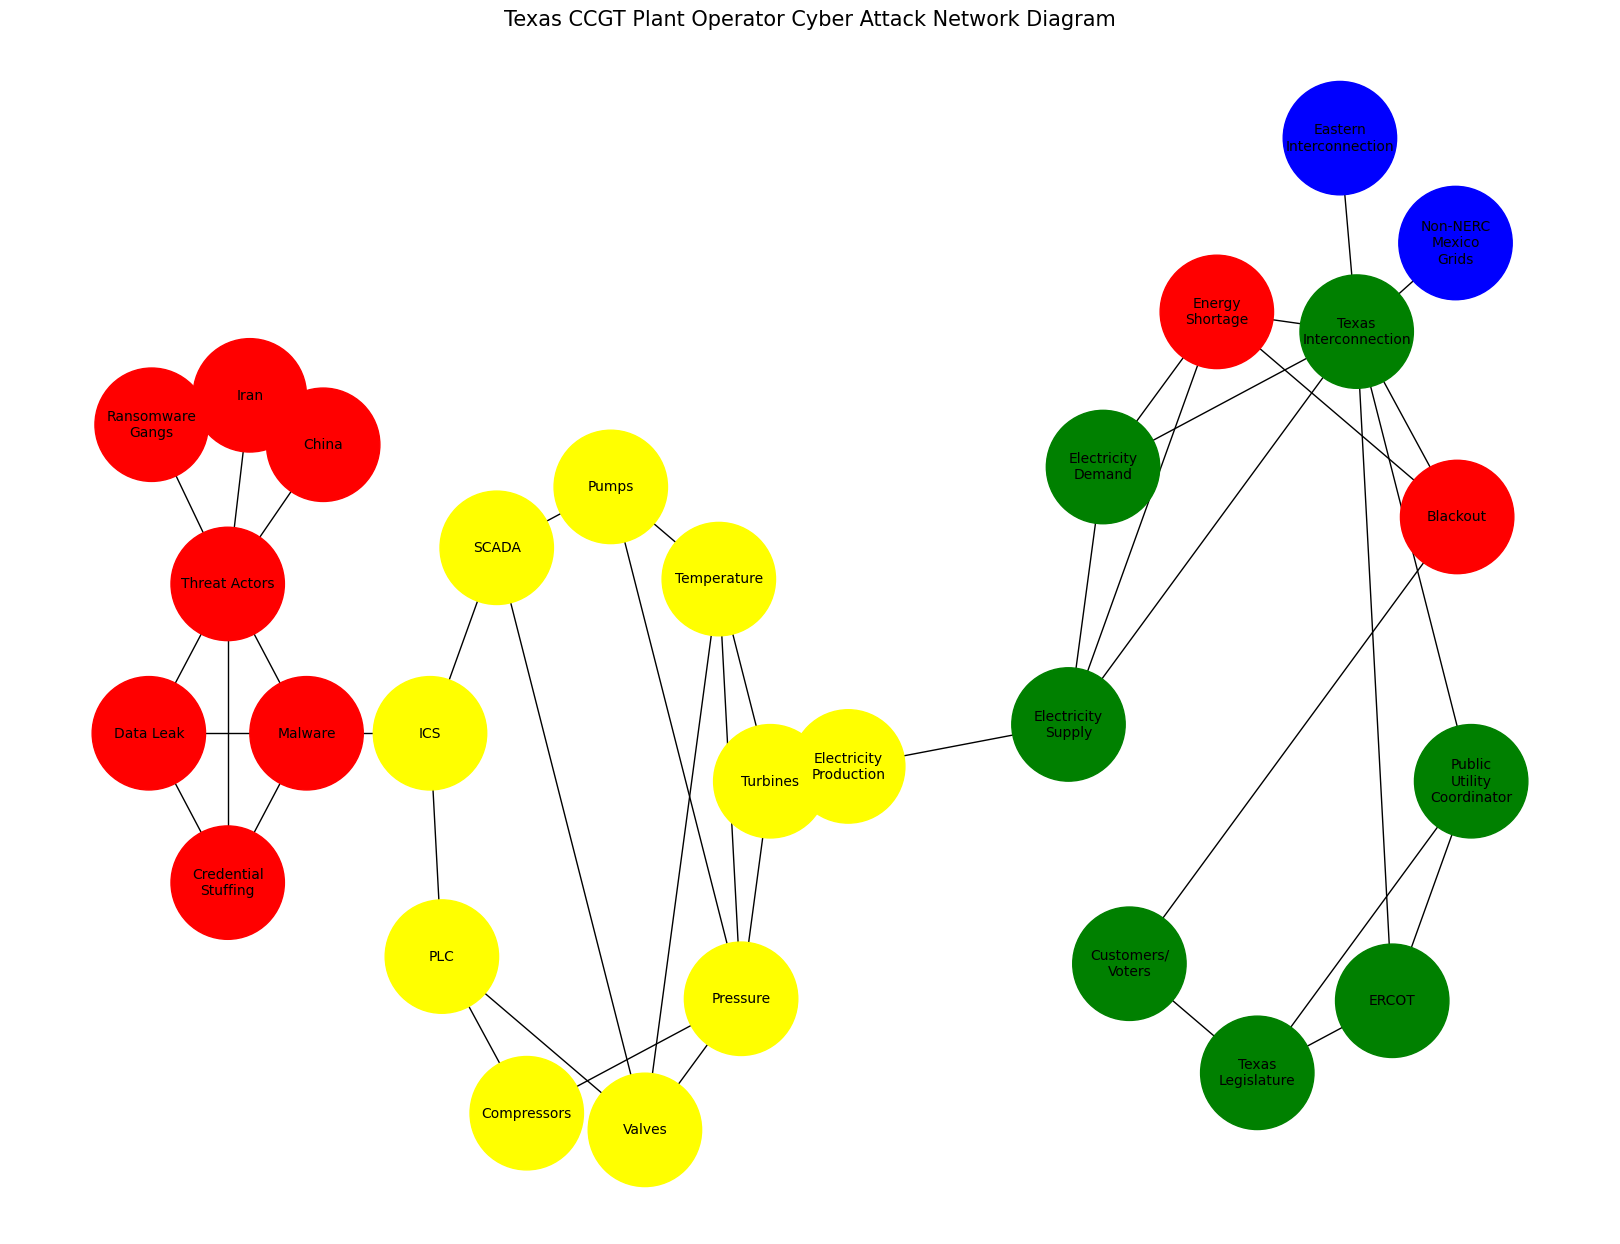

In [16]:
# Categorizing nodes by their groups for coloring
node_colors = {}
threats = ["Threat Actors", "China", "Iran", "Ransomware\nGangs", "Data Leak", "Credential\nStuffing", "Malware", "Energy\nShortage", "Blackout"]
generation = ["ICS", "SCADA", "PLC", "Valves", "Pumps", "Compressors", "Pressure", "Temperature", "Turbines", "Electricity\nProduction"]
governance = ["Electricity\nSupply", "Electricity\nDemand", "Texas\nInterconnection", "ERCOT", "Texas\nLegislature", "Public\nUtility\nCoordinator", "Customers/\nVoters"]
dc_ties = ["Non-NERC\nMexico\nGrids", "Eastern\nInterconnection"]

# Assign colors to each node based on its group
for node in threats:
    node_colors[node] = 'red'  # Threats
for node in generation:
    node_colors[node] = 'yellow'  # Generation
for node in governance:
    node_colors[node] = 'green'  # Governance
for node in dc_ties:
    node_colors[node] = 'blue'  # DC ties

# Assigning the node color list in the drawing command
colors = [node_colors[node] for node in G.nodes()]

# Drawing
plt.figure(figsize=(16, 12))
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=6666, edge_color='black', linewidths=1, font_size=10, arrows=False)
plt.title("Texas CCGT Plant Operator Cyber Attack Network Diagram", fontsize=15)
plt.savefig('network_diagram_colored.png', bbox_inches='tight')
plt.show()


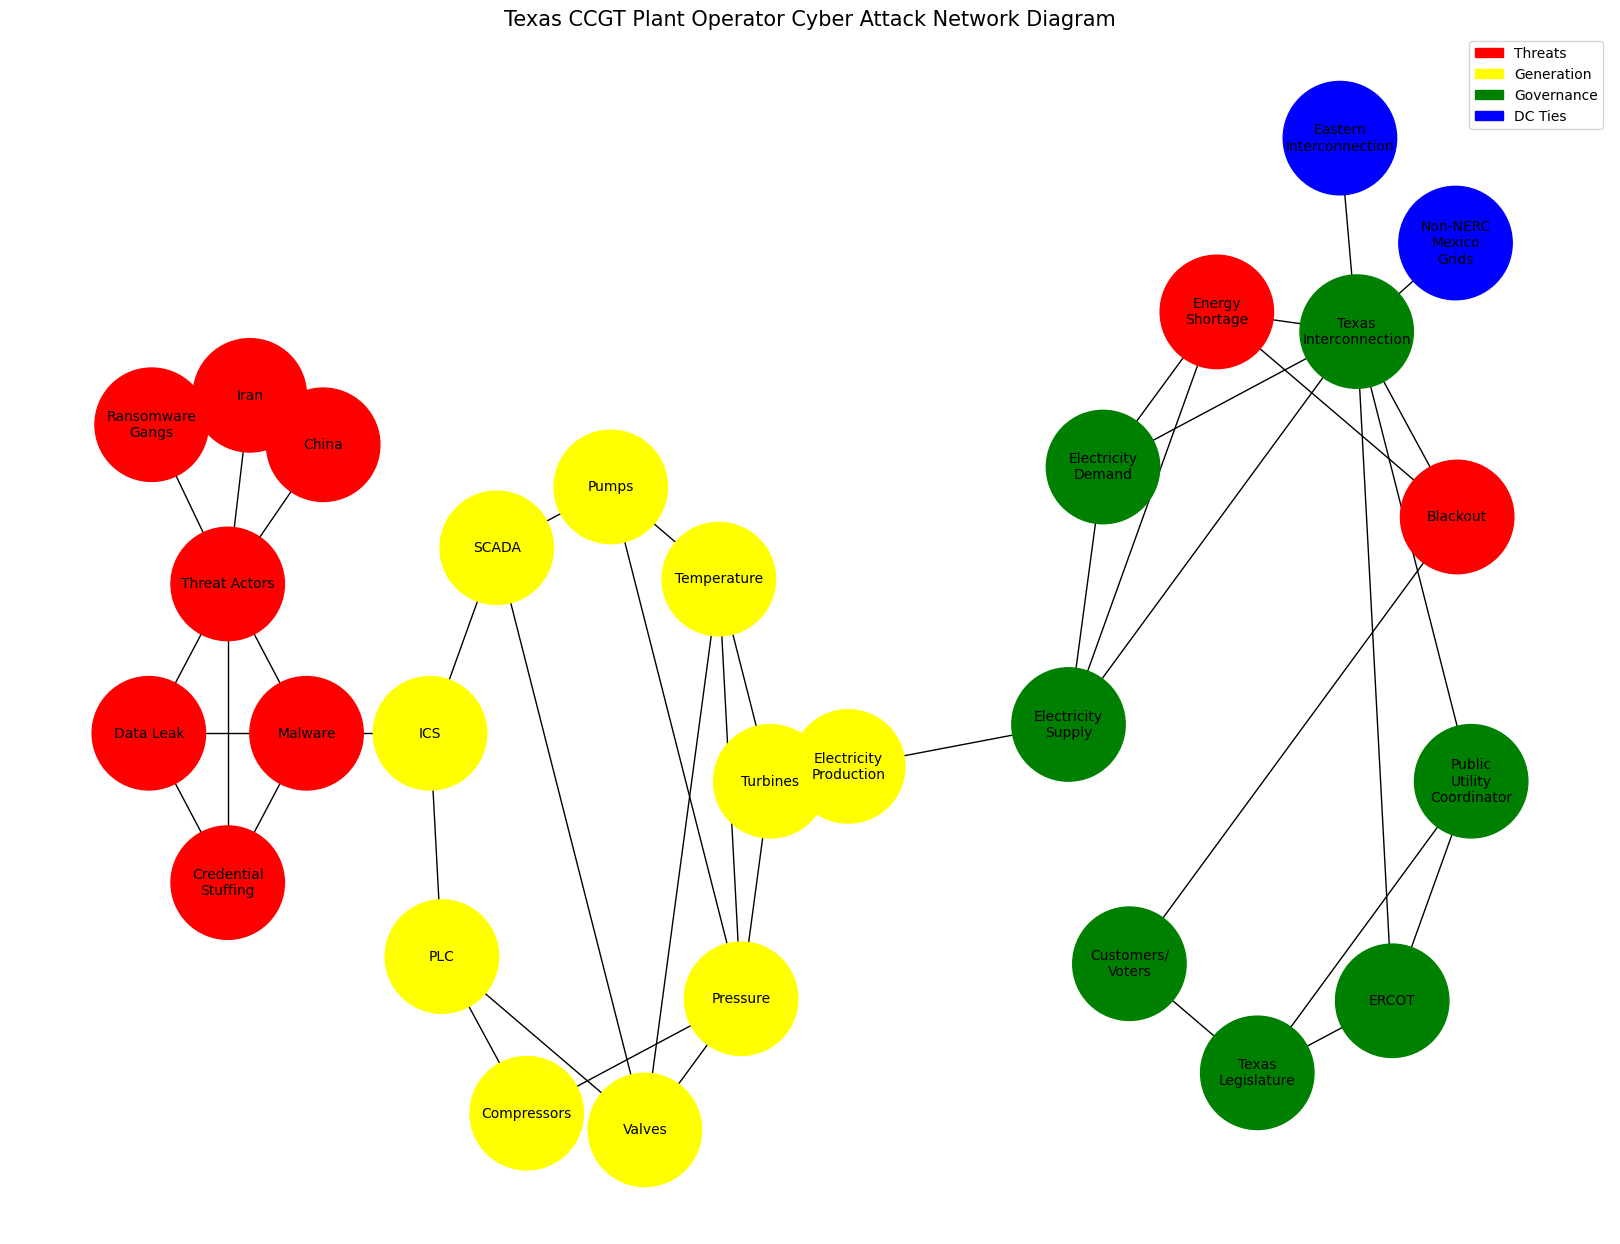

In [17]:
import matplotlib.patches as mpatches

# Drawing
plt.figure(figsize=(16, 12))
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=6666, edge_color='black', linewidths=1, font_size=10, arrows=False)

# Create a patch (color code) for each category
red_patch = mpatches.Patch(color='red', label='Threats')
yellow_patch = mpatches.Patch(color='yellow', label='Generation')
green_patch = mpatches.Patch(color='green', label='Governance')
blue_patch = mpatches.Patch(color='blue', label='DC Ties')

# Add legend to the plot
plt.legend(handles=[red_patch, yellow_patch, green_patch, blue_patch], loc='best')

plt.title("Texas CCGT Plant Operator Cyber Attack Network Diagram", fontsize=15)
plt.savefig('network_diagram.png', bbox_inches='tight')
plt.show()


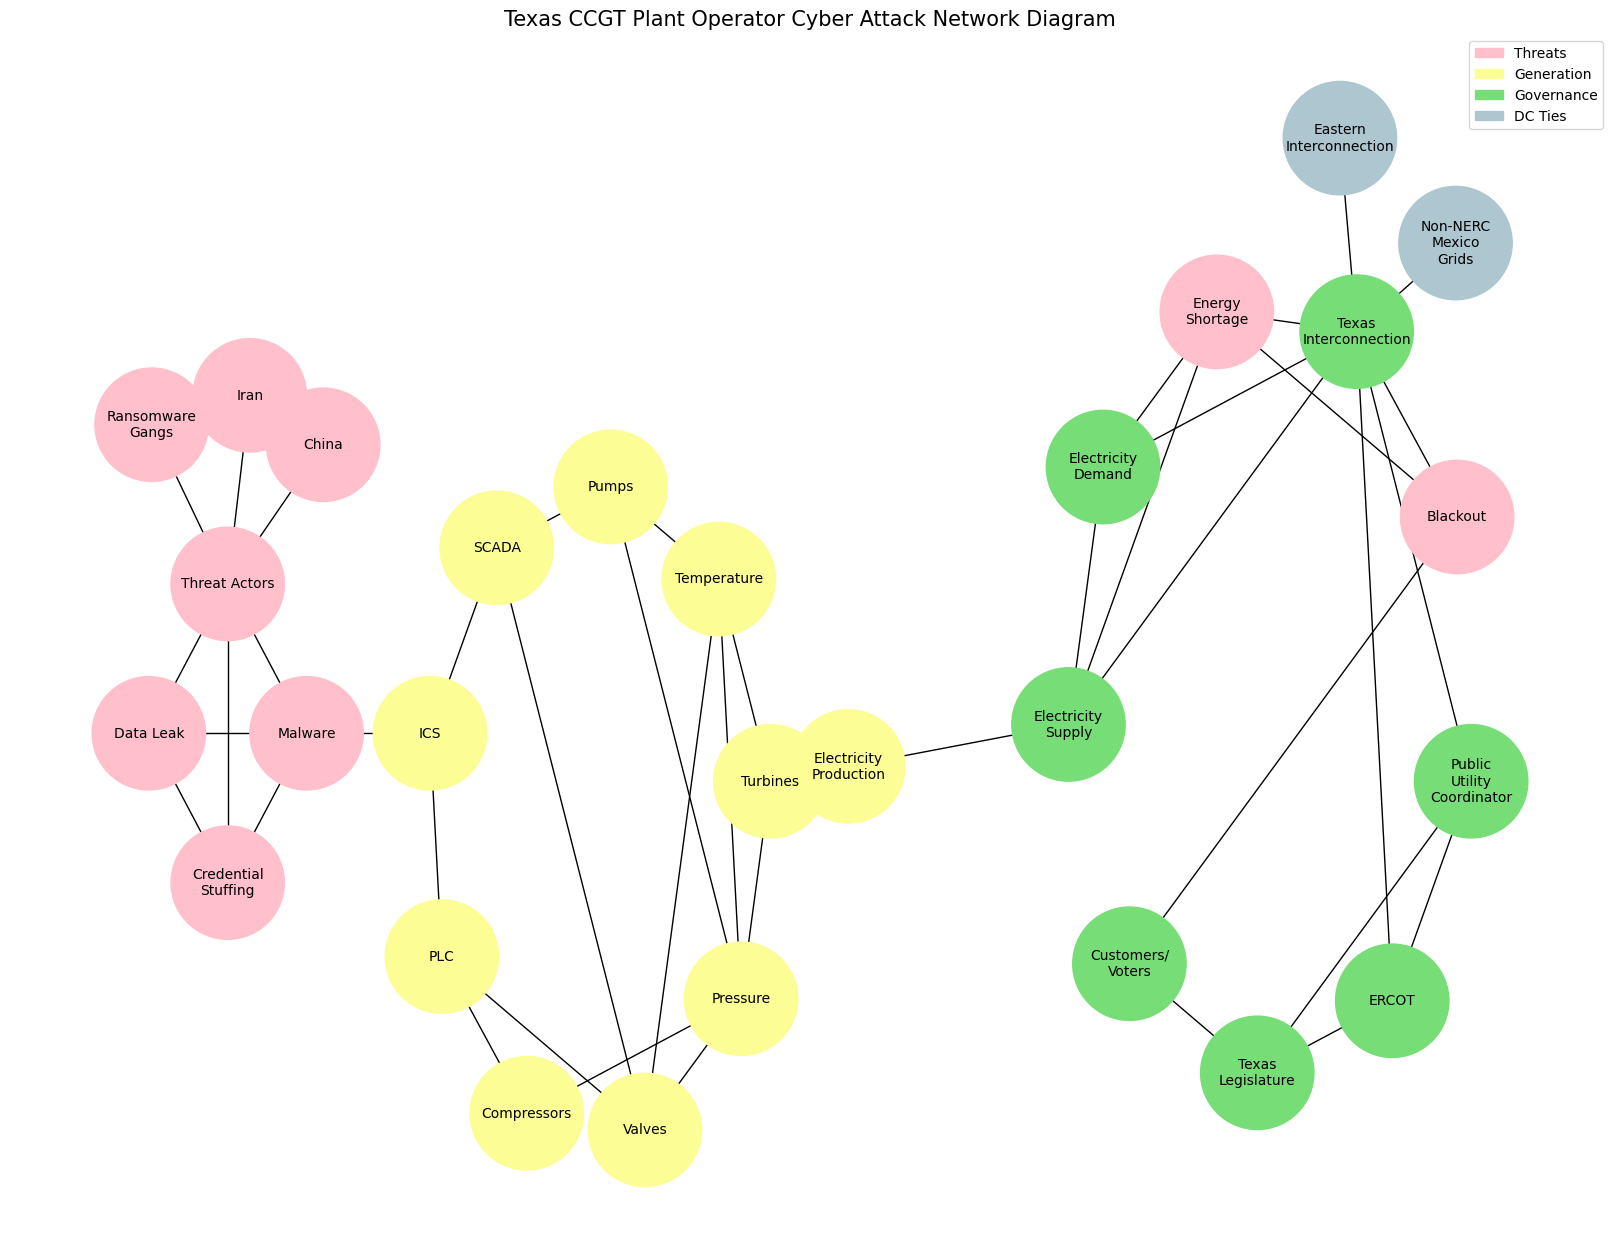

In [18]:
import matplotlib.patches as mpatches

# Adjusted to pastel colors
pastel_red = '#FFC0CB'  # Pastel red for Threats
pastel_yellow = '#FDFD96'  # Pastel yellow for Generation
pastel_green = '#77DD77'  # Pastel green for Governance
pastel_blue = '#AEC6CF'  # Pastel blue for DC Ties

# Assign pastel colors to each node based on its group
for node in threats:
    node_colors[node] = pastel_red  # Threats
for node in generation:
    node_colors[node] = pastel_yellow  # Generation
for node in governance:
    node_colors[node] = pastel_green  # Governance
for node in dc_ties:
    node_colors[node] = pastel_blue  # DC ties

# Assigning the pastel node color list in the drawing command
colors = [node_colors[node] for node in G.nodes()]

# Drawing
plt.figure(figsize=(16, 12))
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=6666, edge_color='black', linewidths=1, font_size=10, arrows=False)

# Create a patch (color code) for each category with pastel colors
red_patch = mpatches.Patch(color=pastel_red, label='Threats')
yellow_patch = mpatches.Patch(color=pastel_yellow, label='Generation')
green_patch = mpatches.Patch(color=pastel_green, label='Governance')
blue_patch = mpatches.Patch(color=pastel_blue, label='DC Ties')

# Add legend to the plot with pastel colors
plt.legend(handles=[red_patch, yellow_patch, green_patch, blue_patch], loc='best')

plt.title("Texas CCGT Plant Operator Cyber Attack Network Diagram", fontsize=15)
plt.savefig('network_diagram.png', bbox_inches='tight')
plt.show()


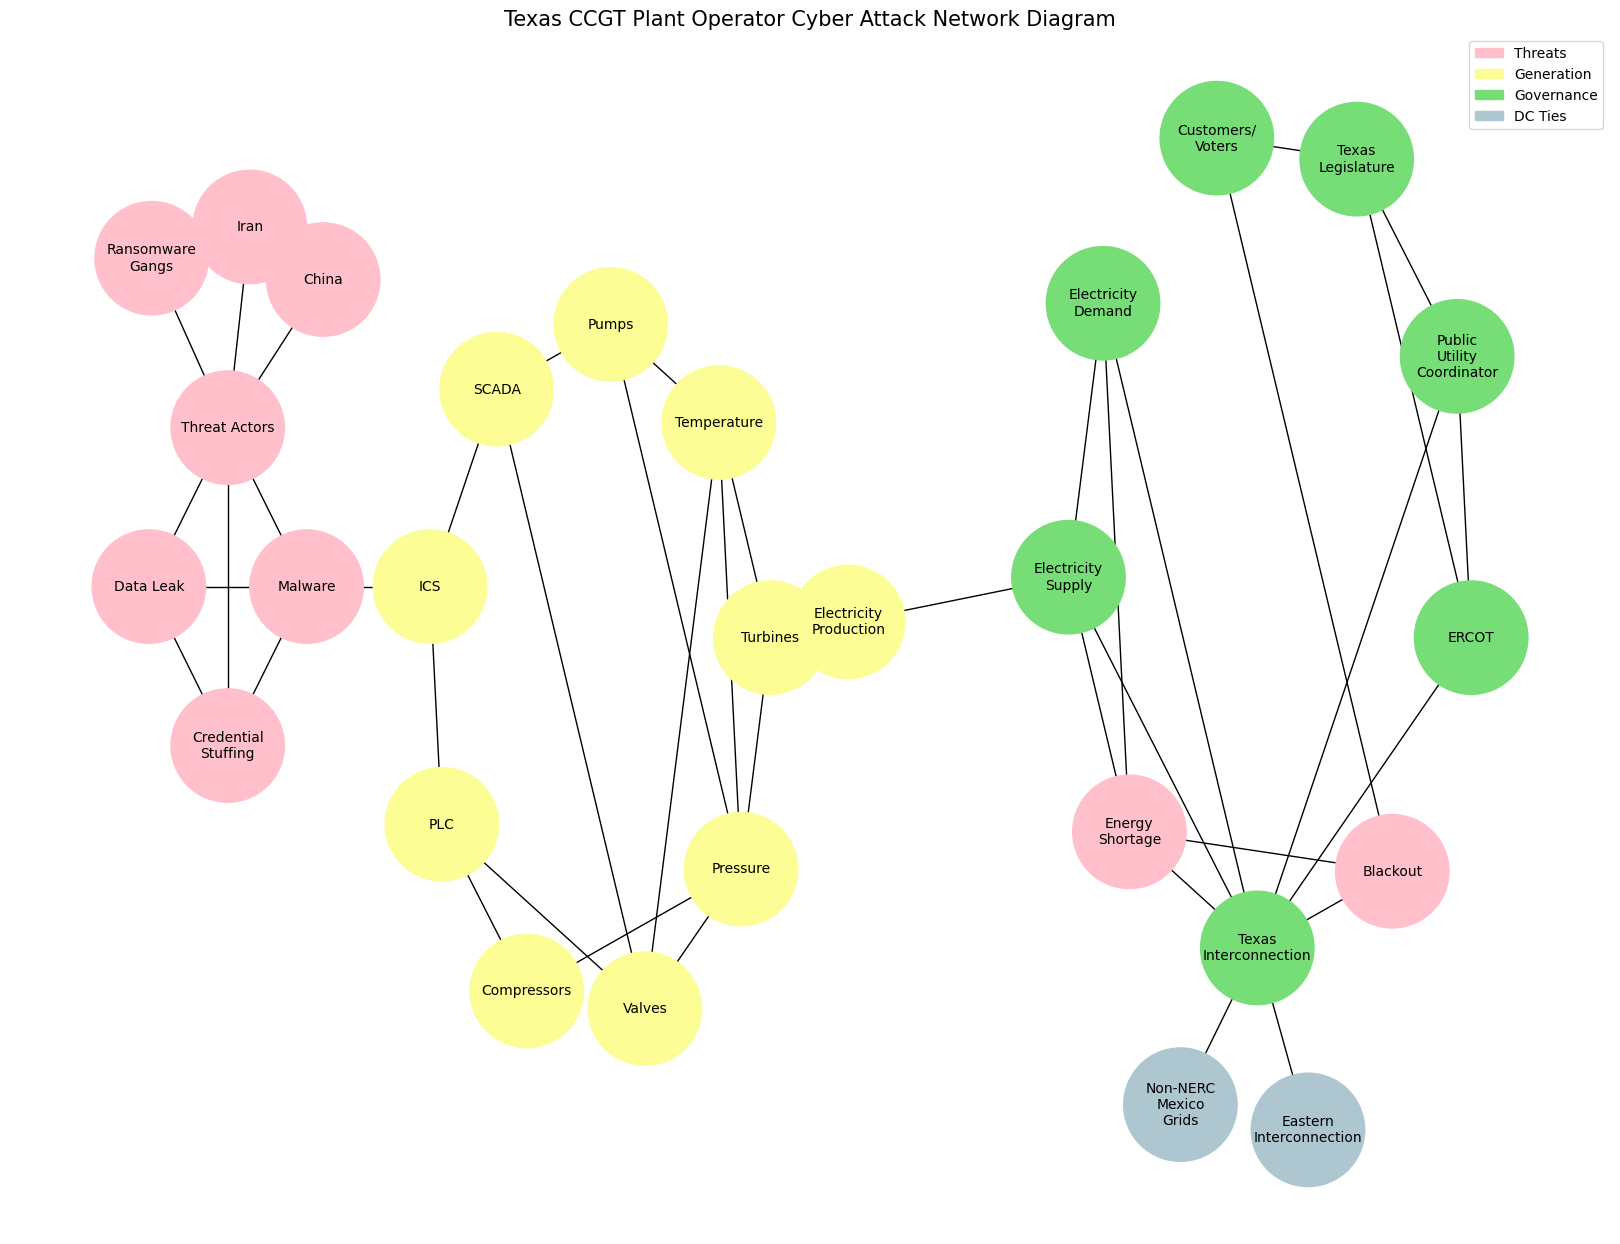

In [35]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pygraphviz as pgv
from networkx.drawing.nx_agraph import graphviz_layout

# Creating a directed graph
G = nx.DiGraph()

# Adding nodes
nodes = [
    "Threat Actors", "China", "Iran", "Ransomware\nGangs", "Data Leak", "Credential\nStuffing", "Malware", "Energy\nShortage", "Blackout", # red, threats
    "ICS", "SCADA", "PLC", "Valves", "Pumps", "Compressors", "Pressure", "Temperature", "Turbines", "Electricity\nProduction", # yellow, generation
    "Electricity\nSupply",  "Electricity\nDemand", "Texas\nInterconnection", "ERCOT", "Texas\nLegislature", "Public\nUtility\nCoordinator", "Customers/\nVoters", # green, governance
    "Non-NERC\nMexico\nGrids", "Eastern\nInterconnection" # blue, dc ties
]
G.add_nodes_from(nodes)

# Adding edges
edges = [
    ("China", "Threat Actors"),
    ("Iran", "Threat Actors"),
    ("Ransomware\nGangs", "Threat Actors"),
    ("Threat Actors", "Malware"),
    ("Threat Actors", "Data Leak"),
    ("Threat Actors", "Credential\nStuffing"),
    ("Electricity\nDemand", "Electricity\nSupply"),
    ("Energy\nShortage", "Electricity\nDemand"),
    ("Electricity\nSupply", "Energy\nShortage"),
    ("Data Leak", "Credential\nStuffing"),
    ("Credential\nStuffing", "Malware"),
    ("Malware", "Data Leak"),
    ("Energy\nShortage", "Blackout"),
    ("Malware","ICS"),
    ("ICS","SCADA"),
    ("ICS","PLC"),
    ("PLC", "Valves"),
    ("SCADA", "Valves"),
    ("PLC","Compressors"),
    ("Pressure", "Temperature"),
    ("SCADA","Pumps"),
    ("Pumps","Pressure"),
    ("Valves","Pressure"),
    ("Compressors","Pressure"),
    ("Temperature","Turbines"),
    ("Pressure","Turbines"),
    ("Turbines","Electricity\nProduction"),
    ("Electricity\nProduction", "Electricity\nSupply"),
    ("Valves", "Temperature"),
    ("Pumps","Temperature"),
    ("Texas\nInterconnection","Electricity\nSupply"),
    ("Texas\nInterconnection","Electricity\nDemand"),
    ("Texas\nInterconnection","Energy\nShortage"),
    ("Texas\nInterconnection","Blackout"),
    ("Texas\nInterconnection","ERCOT"),
    ("Texas\nInterconnection","Public\nUtility\nCoordinator"),
    ("Texas\nInterconnection","Non-NERC\nMexico\nGrids"),
    ("Texas\nInterconnection","Eastern\nInterconnection"),
    ("Texas\nLegislature","Public\nUtility\nCoordinator"),
    ("Texas\nLegislature","ERCOT"),
    ("Customers/\nVoters","Texas\nLegislature"),
    ("Customers/\nVoters","Blackout"),
    ("Public\nUtility\nCoordinator","ERCOT")
    
]
G.add_edges_from(edges)

# Use Graphviz to layout the graph
# Here, you can choose from different Graphviz algorithms by changing 'prog'
pos = graphviz_layout(G, prog='circo')  # 'dot', 'neato', 'fdp', 'sfdp', 'twopi', 'circo'

# Categorizing nodes by their groups for coloring
node_colors = {}
threats = nodes[0:9]
# threats = ["Threat Actors", "China", "Iran", "Ransomware\nGangs", "Data Leak", "Credential\nStuffing", "Malware", "Energy\nShortage", "Blackout"]
# print(nodes[0:8])
generation = nodes[9:19]
#generation = ["ICS", "SCADA", "PLC", "Valves", "Pumps", "Compressors", "Pressure", "Temperature", "Turbines", "Electricity\nProduction"]
governance = nodes[19:26]
# governance = ["Electricity\nSupply", "Electricity\nDemand", "Texas\nInterconnection", "ERCOT", "Texas\nLegislature", "Public\nUtility\nCoordinator", "Customers/\nVoters"]
dc_ties = nodes[26:]
# dc_ties = ["Non-NERC\nMexico\nGrids", "Eastern\nInterconnection"]

# Pastel colors
red = '#FFC0CB'  # Pastel red for Threats
yellow = '#FDFD96'  # Pastel yellow for Generation
green = '#77DD77'  # Pastel green for Governance
blue = '#AEC6CF'  # Pastel blue for DC Ties

# Assign colors to each node based on its group
for node in threats:
    node_colors[node] = red  # Threats
for node in generation:
    node_colors[node] = yellow  # Generation
for node in governance:
    node_colors[node] = green  # Governance
for node in dc_ties:
    node_colors[node] = blue  # DC ties

# Assigning the node color list in the drawing command
colors = [node_colors[node] for node in G.nodes()]

# Drawing
plt.figure(figsize=(16, 12))
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=6666, edge_color='black', linewidths=1, font_size=10, arrows=False)

# Create a patch (color code) for each category
red_patch = mpatches.Patch(color=red, label='Threats')
yellow_patch = mpatches.Patch(color=yellow, label='Generation')
green_patch = mpatches.Patch(color=green, label='Governance')
blue_patch = mpatches.Patch(color=blue, label='DC Ties')

# Add legend to the plot
plt.legend(handles=[red_patch, yellow_patch, green_patch, blue_patch], loc='best')

plt.title("Texas CCGT Plant Operator Cyber Attack Network Diagram", fontsize=15)
plt.savefig('network_diagram.png', bbox_inches='tight')
plt.show()


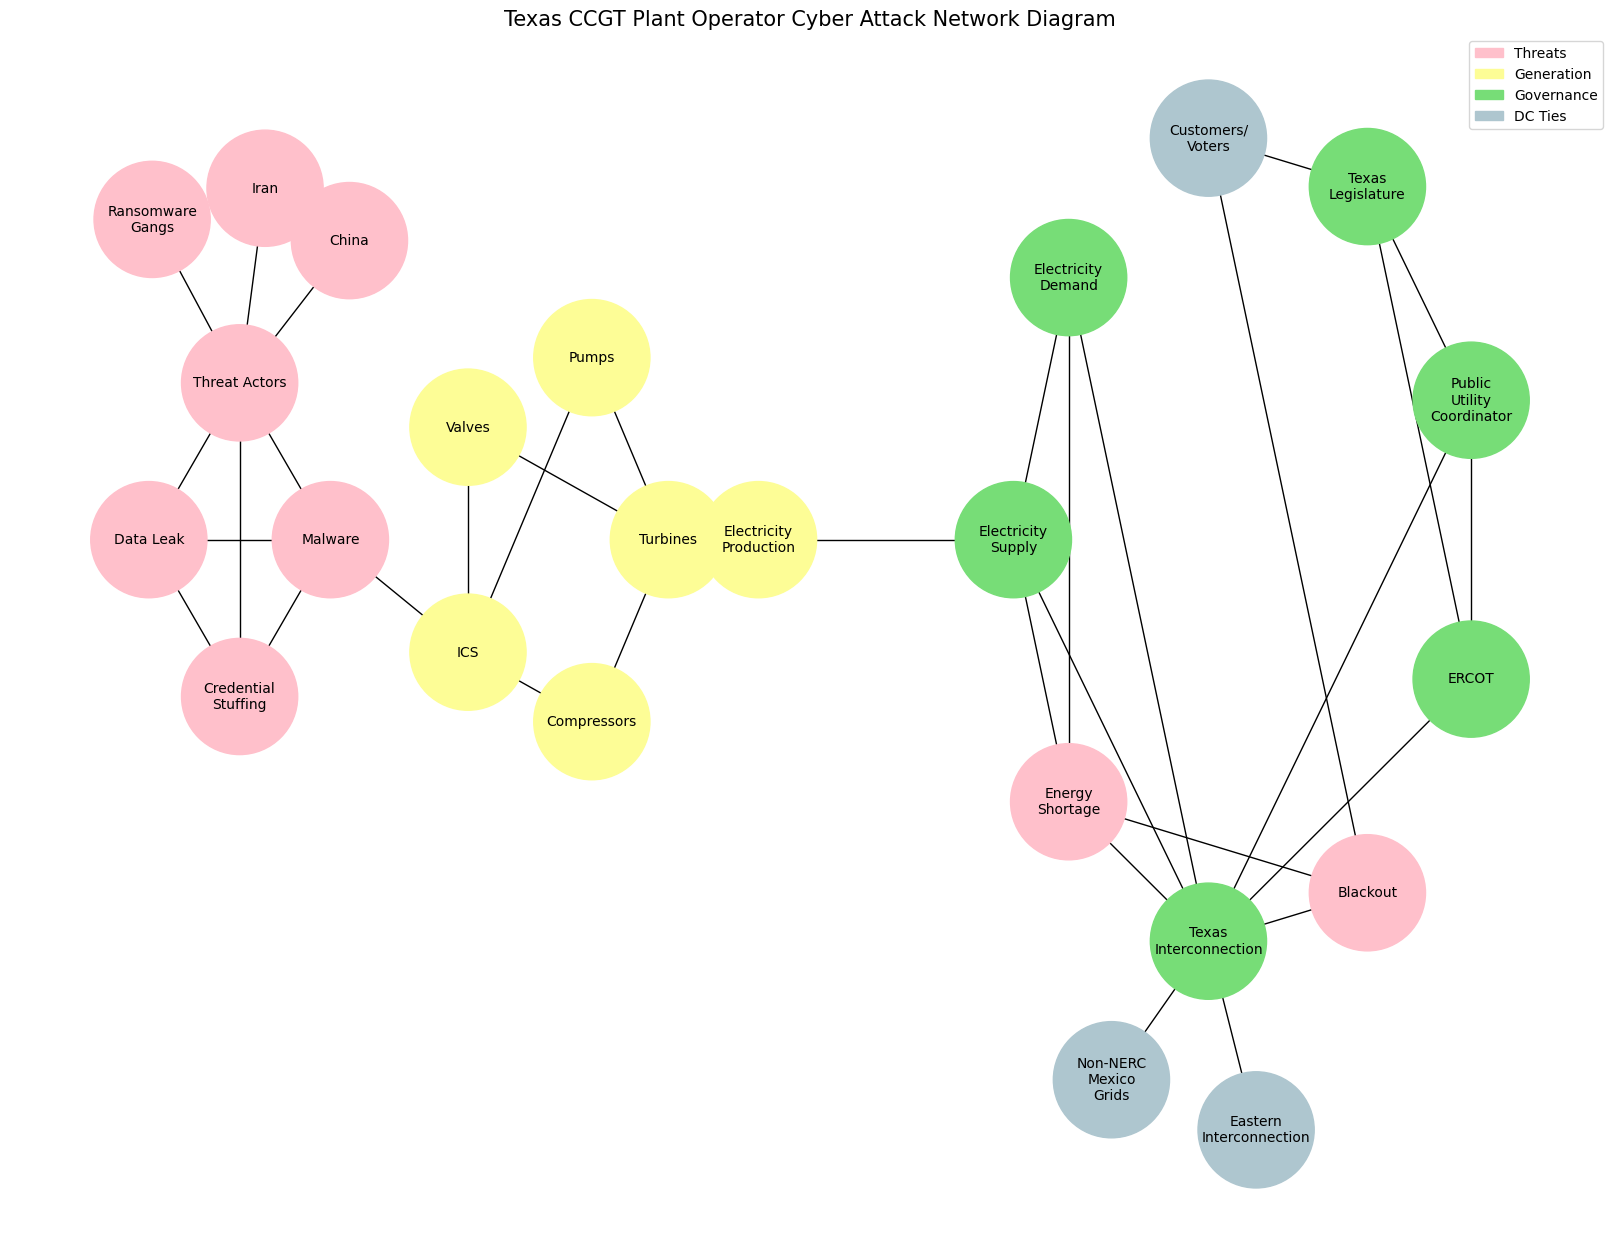

In [41]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pygraphviz as pgv
from networkx.drawing.nx_agraph import graphviz_layout

# Creating a directed graph
G = nx.DiGraph()

# Adding nodes
nodes = [
    "Threat Actors", "China", "Iran", "Ransomware\nGangs", "Data Leak", "Credential\nStuffing", "Malware", "Energy\nShortage", "Blackout", # red, threats
    "ICS", "Valves", "Compressors", "Pumps", "Turbines", "Electricity\nProduction", # yellow, generation
    "Electricity\nSupply",  "Electricity\nDemand", "Texas\nInterconnection", "ERCOT", "Texas\nLegislature", "Public\nUtility\nCoordinator", "Customers/\nVoters", # green, governance
    "Non-NERC\nMexico\nGrids", "Eastern\nInterconnection" # blue, dc ties
]
G.add_nodes_from(nodes)

# Adding edges
edges = [
    ("China", "Threat Actors"),
    ("Iran", "Threat Actors"),
    ("Ransomware\nGangs", "Threat Actors"),
    ("Threat Actors", "Malware"),
    ("Threat Actors", "Data Leak"),
    ("Threat Actors", "Credential\nStuffing"),
    ("Electricity\nDemand", "Electricity\nSupply"),
    ("Energy\nShortage", "Electricity\nDemand"),
    ("Electricity\nSupply", "Energy\nShortage"),
    ("Data Leak", "Credential\nStuffing"),
    ("Credential\nStuffing", "Malware"),
    ("Malware", "Data Leak"),
    ("Energy\nShortage", "Blackout"),
    ("Malware","ICS"),


    ("ICS", "Valves"),
    ("ICS", "Valves"),
    ("ICS","Compressors"),
    ("ICS","Pumps"),
    ("Pumps","Turbines"),
    ("Valves","Turbines"),
    ("Compressors","Turbines"),
    ("Turbines","Electricity\nProduction"),
    ("Electricity\nProduction", "Electricity\nSupply"),
    ("Valves", "Turbines"),
    ("Pumps","Turbines"),
    ("Texas\nInterconnection","Electricity\nSupply"),
    ("Texas\nInterconnection","Electricity\nDemand"),
    ("Texas\nInterconnection","Energy\nShortage"),
    ("Texas\nInterconnection","Blackout"),
    ("Texas\nInterconnection","ERCOT"),
    ("Texas\nInterconnection","Public\nUtility\nCoordinator"),
    ("Texas\nInterconnection","Non-NERC\nMexico\nGrids"),
    ("Texas\nInterconnection","Eastern\nInterconnection"),
    ("Texas\nLegislature","Public\nUtility\nCoordinator"),
    ("Texas\nLegislature","ERCOT"),
    ("Customers/\nVoters","Texas\nLegislature"),
    ("Customers/\nVoters","Blackout"),
    ("Public\nUtility\nCoordinator","ERCOT")
    
]
G.add_edges_from(edges)

# Use Graphviz to layout the graph
# Here, you can choose from different Graphviz algorithms by changing 'prog'
pos = graphviz_layout(G, prog='circo')  # 'dot', 'neato', 'fdp', 'sfdp', 'twopi', 'circo'

# Categorizing nodes by their groups for coloring
node_colors = {}
threats = nodes[0:9]
generation = nodes[9:15]
governance = nodes[15:21]
dc_ties = nodes[21:]

# Pastel colors
red = '#FFC0CB'  # Pastel red for Threats
yellow = '#FDFD96'  # Pastel yellow for Generation
green = '#77DD77'  # Pastel green for Governance
blue = '#AEC6CF'  # Pastel blue for DC Ties

# Assign colors to each node based on its group
for node in threats:
    node_colors[node] = red  # Threats
for node in generation:
    node_colors[node] = yellow  # Generation
for node in governance:
    node_colors[node] = green  # Governance
for node in dc_ties:
    node_colors[node] = blue  # DC ties

# Assigning the node color list in the drawing command
colors = [node_colors[node] for node in G.nodes()]

# Drawing
plt.figure(figsize=(16, 12))
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=7000, edge_color='black', linewidths=1, font_size=10, arrows=False)

# Create a patch (color code) for each category
red_patch = mpatches.Patch(color=red, label='Threats')
yellow_patch = mpatches.Patch(color=yellow, label='Generation')
green_patch = mpatches.Patch(color=green, label='Governance')
blue_patch = mpatches.Patch(color=blue, label='DC Ties')

# Add legend to the plot
plt.legend(handles=[red_patch, yellow_patch, green_patch, blue_patch], loc='best')

plt.title("Texas CCGT Plant Operator Cyber Attack Network Diagram", fontsize=15)
plt.savefig('network_diagram.png', bbox_inches='tight')
plt.show()

# stock and flow = variables
# network diagram = physical infrastructure/group

# remove electricity generation
# texas interconnection has to go,
# transmission lines
# ERCOT balancing authority, reliability coordinator

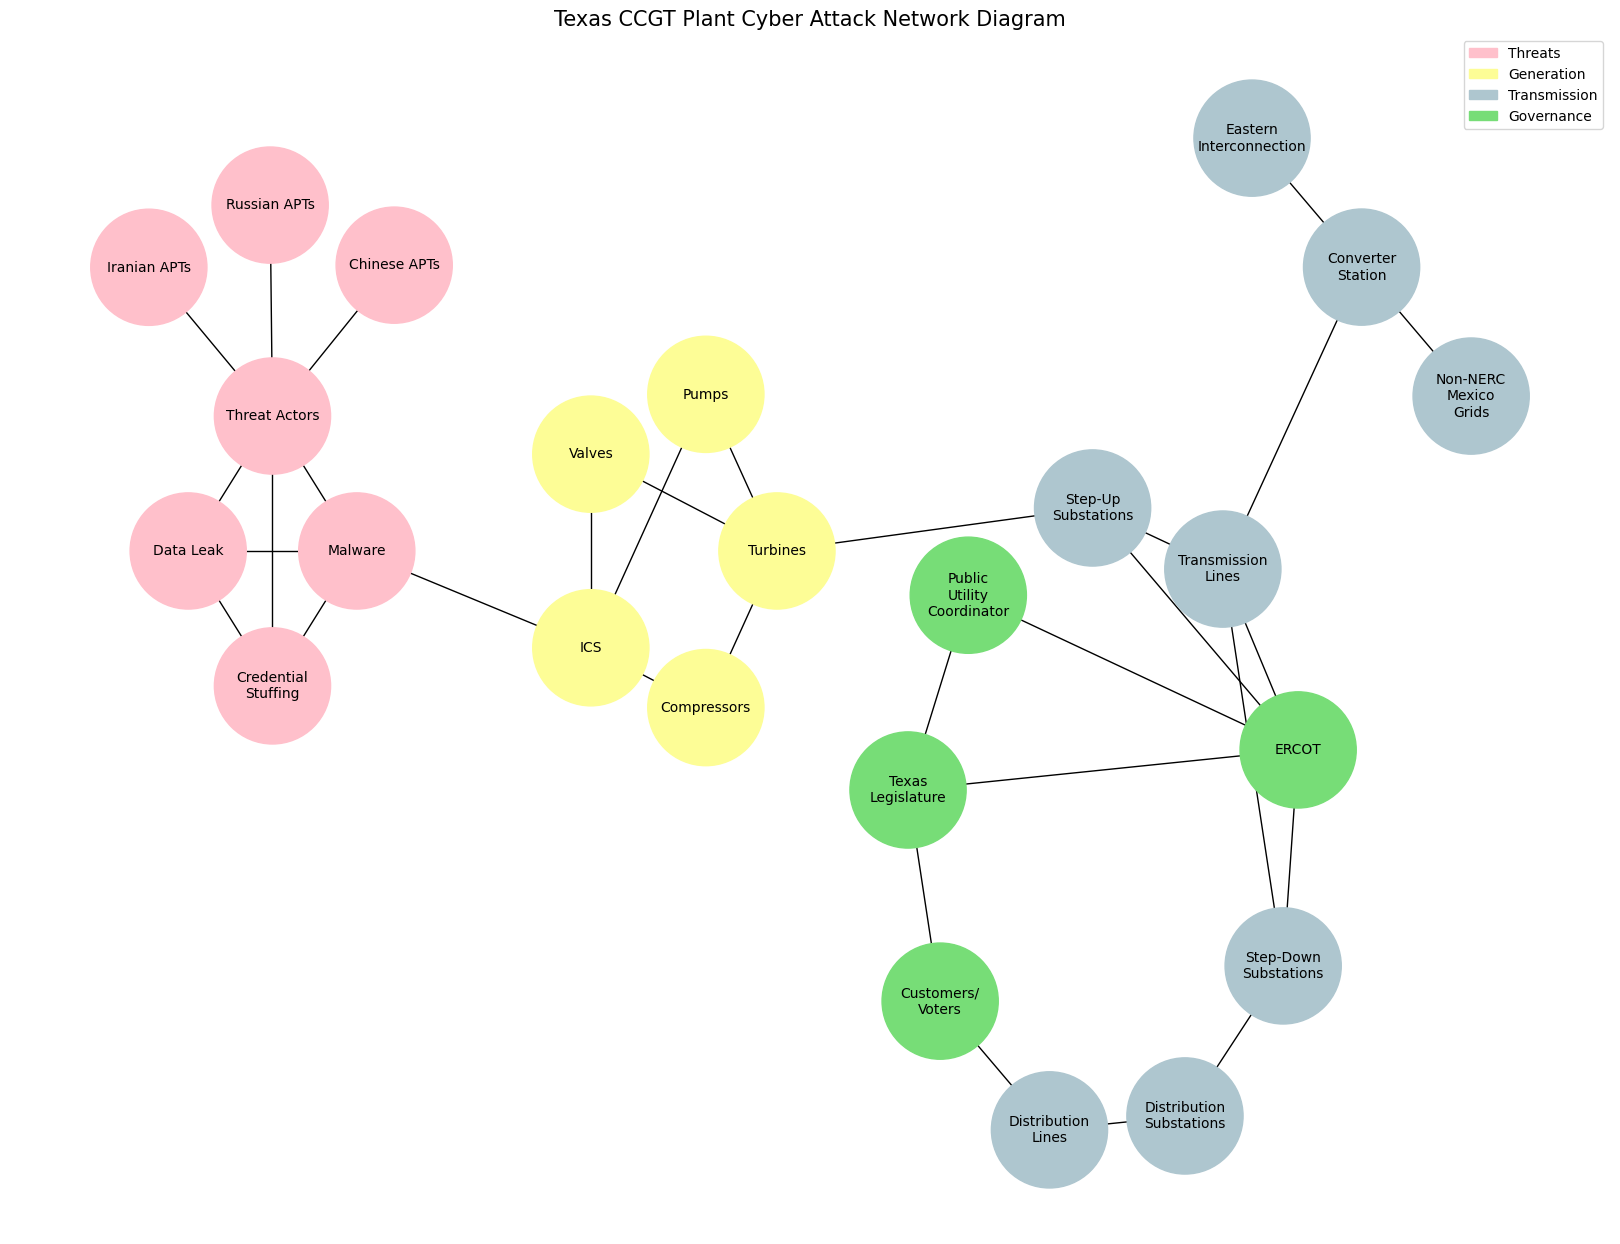

In [80]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pygraphviz as pgv
from networkx.drawing.nx_agraph import graphviz_layout
import networkx as nx

# Creating a directed graph
G = nx.DiGraph()

# Adding nodes
threats = ["Threat Actors", "Chinese APTs", "Russian APTs", "Iranian APTs", "Data Leak", "Credential\nStuffing", "Malware"]
generation = ["ICS", "Valves", "Compressors", "Pumps", "Turbines"]
governance = ["ERCOT", "Texas\nLegislature", "Public\nUtility\nCoordinator", "Customers/\nVoters"]
transmission=[
    "Non-NERC\nMexico\nGrids","Eastern\nInterconnection", "Step-Up\nSubstations", "Transmission\nLines", 
    "Step-Down\nSubstations", "Distribution\nSubstations", "Distribution\nLines", "Converter\nStation"
]
nodes = threats + generation + governance + transmission    
G.add_nodes_from(nodes)

# Coloring nodes
node_colors = {}
red = '#FFC0CB'  # Pastel red for Threats
yellow = '#FDFD96'  # Pastel yellow for generation
green = '#77DD77'  # Pastel green for Governance
blue = '#AEC6CF'  # Pastel blue for DC Ties
for node in threats:
    node_colors[node] = red  # Threats
for node in generation:
    node_colors[node] = yellow  # Generation
for node in governance:
    node_colors[node] = green  # Governance
for node in transmission:
    node_colors[node] = blue  # Transmission
colors = [node_colors[node] for node in G.nodes()]

# Adding edges
edges = [
    ("Chinese APTs", "Threat Actors"),
    ("Russian APTs", "Threat Actors"),
    ("Iranian APTs", "Threat Actors"),
    ("Threat Actors", "Malware"),
    ("Threat Actors", "Data Leak"),
    ("Threat Actors", "Credential\nStuffing"),
    ("Data Leak", "Credential\nStuffing"),
    ("Credential\nStuffing", "Malware"),
    ("Malware", "Data Leak"),
    ("Malware","ICS"),
    ("ICS", "Valves"),
    ("ICS","Compressors"),
    ("ICS","Pumps"),
    ("Pumps","Turbines"),
    ("Valves","Turbines"),
    ("Compressors","Turbines"),
    ("Valves", "Turbines"),
    ("Pumps","Turbines"),
    ("Texas\nLegislature","Public\nUtility\nCoordinator"),
    ("Texas\nLegislature","ERCOT"),
    ("Customers/\nVoters","Texas\nLegislature"),
    ("Public\nUtility\nCoordinator","ERCOT"),
    ("Turbines", "Step-Up\nSubstations"),
    ("Step-Up\nSubstations", "Transmission\nLines"),
    ("Transmission\nLines", "Step-Down\nSubstations"),
    ("Step-Down\nSubstations","Distribution\nSubstations"),
    ("Distribution\nSubstations", "Distribution\nLines"),
    ("Distribution\nLines", "Customers/\nVoters"),
    ("ERCOT","Step-Up\nSubstations"),
    ("ERCOT","Transmission\nLines"),
    ("ERCOT","Step-Down\nSubstations"),
    ("Converter\nStation", "Transmission\nLines"),
    ("Non-NERC\nMexico\nGrids", "Converter\nStation"),
    ("Eastern\nInterconnection","Converter\nStation")
    
]
G.add_edges_from(edges)

# Use Graphviz to layout the graph
# Here, you can choose from different Graphviz algorithms by changing 'prog'
pos = graphviz_layout(G, prog='circo')  # 'dot', 'neato', 'fdp', 'sfdp', 'twopi', 'circo'

# Drawing
plt.figure(figsize=(16, 12))
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=7000, edge_color='black', linewidths=1, font_size=10, arrows=False)

# Create a patch (color code) for each category
red_patch = mpatches.Patch(color=red, label='Threats')
yellow_patch = mpatches.Patch(color=yellow, label='Generation')
blue_patch = mpatches.Patch(color=blue, label='Transmission')
green_patch = mpatches.Patch(color=green, label='Governance')

# Add legend to the plot
plt.legend(handles=[red_patch, yellow_patch, blue_patch, green_patch], loc='best')

plt.title("Texas CCGT Plant Cyber Attack Network Diagram", fontsize=15)
plt.savefig('network_diagram.png', bbox_inches='tight')
plt.show()

# stock and flow = variables
# network diagram = physical infrastructure/groups
# who are the relevant threat actors in ICS compromise? surely China and Russia, but Iran and DPRK too?